<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/Lecture_3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting, Analyzing, and Visualizing Data with Python - Part II
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox - Lecture 3](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

----



## 0. Installing TuriCreate SFrame

In this lecture, we are going to wrok with [TuriCreate](https://github.com/apple/turicreate), let's install it:

In [0]:
!pip install turicreate

     |████████████████████████████████| 91.4MB 54kB/s 
     |████████████████████████████████| 327kB 51.0MB/s 
     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 3.4MB 43.2MB/s 
     |████████████████████████████████| 3.9MB 52.6MB/s 
     |████████████████████████████████| 450kB 50.4MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=e9f0471a8ac746112ccab3afda4742d72e45d7d56c17bae43c5445d4df00065e
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built resampy
  Found existing installation: resampy 0.2.2
    Uninstalling resampy-0.2.2:
      Successfully uninstalled resampy-0.2.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Success

If running the notebook on your own laptop, we recommend installing TuriCreate using anaconda. Use the following command:
```console
$ conda create -n venv anaconda
$ source activate venv
$ pip install -U turicreate
```

Additional installation instructions can be found at [TuriCreate Homepage](https://github.com/apple/turicreate). 


## 1. Introduction to SFrame using Seattle Library Collection Inventory Dataset

Let's analyze the [Seattle Library Collection Inventory Dataset](https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory#library-collection-inventory.csv) (11GB) using SFrame. First, let's download the dataset:

In [0]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
#api_token = {"username":"<Insert Your Kaggle User Name>","key":"<Insert Your Kaggle API key>"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# Creating a dataset directory

!mkdir ./datasets
!mkdir ./datasets/library-collection

# download the dataset from Kaggle and unzip it
!kaggle datasets download city-of-seattle/seattle-library-collection-inventory  -f library-collection-inventory.csv -p ./datasets/library-collection/
!unzip ./datasets/library-collection/*.zip  -d ./datasets/library-collection
!ls ./datasets/library-collection


mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/library-collection’: File exists
100% 3.77G/3.77G [00:53<00:00, 88.3MB/s]

Archive:  ./datasets/library-collection/library-collection-inventory.csv.zip
  inflating: ./datasets/library-collection/library-collection-inventory.csv  
library-collection-inventory.csv  library-collection-inventory.csv.zip


In [0]:
!ls -lh ./datasets/library-collection

total 15G
-rw-r--r-- 1 root root  11G Dec  1 14:57 library-collection-inventory.csv
-rw-r--r-- 1 root root 3.8G Mar  4 11:33 library-collection-inventory.csv.zip


In [0]:
import turicreate as tc
%matplotlib inline

#Loading a CSV to SFrame (this can take some time)
sf = tc.SFrame.read_csv("/content/datasets/library-collection/library-collection-inventory.csv")
sf

Successfully parsed 10 tokens: 
	0: 735439
	1: ["Genealog ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

1 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 100 lines in 1.91192 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

Read 158429 lines. Lines per second: 77084.2

Read 792246 lines. Lines per second: 101511

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-09-01 ... :00:00.000
	8: 1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 6

Read 1425551 lines. Lines per second: 104164

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-10-01 ... :00:00.000
	8: 1

Read 2058239 lines. Lines per second: 104850

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 1

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 1

Read 2691263 lines. Lines per second: 104650

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 6

Read 3323492 lines. Lines per second: 104672

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-11-01 ... :00:00.000
	8: 1

Read 3955167 lines. Lines per second: 104689

Read 4599080 lines. Lines per second: 104951

Read 5244354 lines. Lines per second: 104479

Read 5888741 lines. Lines per second: 104546

Read 6533079 lines. Lines per second: 104328

Read 7176009 lines. Lines per second: 104291

Read 7818996 lines. Lines per second: 104342

Read 8461210 lines. Lines per second: 104300

Read 9102786 lines. Lines per second: 104328

Read 9744360 lines. Lines per second: 104302

Read 10385547 lines. Lines per second: 104285

Read 11026493 lines. Lines per second: 104309

Read 11666922 lines. Lines per second: 104295

Read 12306548 lines. Lines per second: 104264

Read 12946072 lines. Lines per second: 104232

Read 13425702 lines. Lines per second: 103437

Read 14064281 lines. Lines per second: 103435

Read 14703184 lines. Lines per second: 103425

Read 15340937 lines. Lines per second: 103406

Read 15978873 lines. Lines per second: 103371

Read 16617071 lines. Lines per second: 103381

Read 17255802 lines. Lines per second: 103390

Read 17894258 lines. Lines per second: 103371

Read 18532351 lines. Lines per second: 103350

Read 19170174 lines. Lines per second: 103329

Read 19807724 lines. Lines per second: 103316

Read 20444014 lines. Lines per second: 103294

Read 21079789 lines. Lines per second: 103255

Read 21715332 lines. Lines per second: 103221

Read 22350447 lines. Lines per second: 103202

Read 22985600 lines. Lines per second: 103167

Read 23619723 lines. Lines per second: 103146

Read 24253808 lines. Lines per second: 103110

Read 24887351 lines. Lines per second: 103077

Read 25520529 lines. Lines per second: 103052

Read 26152994 lines. Lines per second: 101782

Read 26785396 lines. Lines per second: 101742

Read 27417196 lines. Lines per second: 101734

Read 28048708 lines. Lines per second: 101722

Read 28669987 lines. Lines per second: 101687

Successfully parsed 10 tokens: 
	0: 332256
	1: [Souvenir  ... )",,1930?]
	2: Lumbermen' ... rint. Co.,
	3: 
	4: arbk
	5: casea
	6: 
	7: cen
	8: 2019-07-01 ... :00:00.000
	9: 1

Read 29289200 lines. Lines per second: 101654

Read 29908093 lines. Lines per second: 101600

Read 30525807 lines. Lines per second: 101539

Read 31143775 lines. Lines per second: 101491

Read 31762856 lines. Lines per second: 101440

Read 32382098 lines. Lines per second: 101399

Read 33000088 lines. Lines per second: 101343

Read 33617607 lines. Lines per second: 101283

Read 34235739 lines. Lines per second: 101218

Read 34852922 lines. Lines per second: 101172

Read 35470049 lines. Lines per second: 101370

14 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 35531294 lines in 350.131 secs.

BibNum,Title,Author,ISBN,PublicationYear
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie","1481425730, 1481425749,9781481425735, ...",2014.
2248846,"Naruto. Vol. 1, UzumakiNaruto / story and ar ...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999."
3209270,"Peace, love & Wi-Fi : aZITS treasury / by Jerry ...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.
1907265,The Paris pilgrims : anovel / Clancy Carlile. ...,"Carlile, Clancy, 1930-",0786706155,c1999.
1644616,"Erotic by nature : acelebration of life, of ...",,094020813X,"1991, c1988."
1736505,Children of Cambodia'skilling fields : memoirs ...,,"0300068395, 0300078730",c1997.
1749492,Anti-Zionism : analyticalreflections / editors: ...,,091559773X,c1989.
3270562,Hard-hearted Highlander /Julia London. ...,"London, Julia","0373789998, 037380394X,9780373789993, ...",[2017]
3264577,The Sandcastle Empire /Kayla Olson. ...,"Olson, Kayla","0062484877, 9780062484871",2017.
3236819,Doctor Who. The return ofDoctor Mysterio / BBC ; ...,,,[2017]


We loaded 35.5 million rows with 13 columns to an SFrame object. We can get a first impression of the data in the dataset by using the *show* function:

In [0]:
sf.show()

Materializing SFrame

Let's create a new column with the publication year of each book as an integer:

In [0]:
sf['PublicationYear'] # SArray object

dtype: str
Rows: 35531294
['2014.', '2003, c1999.', '2014.', 'c1999.', '1991, c1988.', 'c1997.', 'c1989.', '[2017]', '2017.', '[2017]', '2014.', '[2015]', '[2006?]', '2017.', '2017.', 'c2015.', '2016.', '[2015]', '2016.', 'c2008.', '2016.', '2000.', '1960.', 'c2000.', 'c2014.', '[2014]', '©2014', 'c2005.', '2008.', '2004.', '[2015]', '2012.', '[1983]', 'c1987.', '2014.', '2011.', '2005.', 'c2012.', '[1973]', '[2016]', '[1958]', '2012.', '[2016]', 'c2009.', '2016.', '2008.', '1982.', '1974.', 'c2012.', '2001.', '2016.', 'p2009.', '[2017]', '1981.', '2013.', '2011.', '[2014]', '2014.', 'c2002.', '2016.', 'c2011.', '2017.', '2015.', 'c2000.', '', '2013.', '1988.', '[2017]', '', '2013.', '2016.', '[2016]', 'c2007.', '[1971]', 'c1945.', '[2016]', '[2010]', 'c2012.', 'c1994.', '1974.', '2001, c2000.', '1905.', '1995.', 'p2002.', '2011.', 'c2007.', '2011.', 'c2011.', 'c2002.', 'c2010.', '2012.', 'p1990.', 'c2003.', 'c2011.', '1998.', 'c2013.', '2009.', '', 'c2013.', '[2015]', ... ]

In [0]:
import re
r = re.compile('\\d{4}')
def get_year(y_str):
    l = r.findall(y_str) # take the first year
    if len(l) == 0:
        return None
    return int(l[0])

sf['year'] = sf['PublicationYear'].apply(lambda s: get_year(s))
sf['year']
    

dtype: int
Rows: 35531294
[2014, 2003, 2014, 1999, 1991, 1997, 1989, 2017, 2017, 2017, 2014, 2015, 2006, 2017, 2017, 2015, 2016, 2015, 2016, 2008, 2016, 2000, 1960, 2000, 2014, 2014, 2014, 2005, 2008, 2004, 2015, 2012, 1983, 1987, 2014, 2011, 2005, 2012, 1973, 2016, 1958, 2012, 2016, 2009, 2016, 2008, 1982, 1974, 2012, 2001, 2016, 2009, 2017, 1981, 2013, 2011, 2014, 2014, 2002, 2016, 2011, 2017, 2015, 2000, None, 2013, 1988, 2017, None, 2013, 2016, 2016, 2007, 1971, 1945, 2016, 2010, 2012, 1994, 1974, 2001, 1905, 1995, 2002, 2011, 2007, 2011, 2011, 2002, 2010, 2012, 1990, 2003, 2011, 1998, 2013, 2009, None, 2013, 2015, ... ]

In [0]:
?sf.materialize
sf.materialize()

Let's find in which year there are the most published books:

In [0]:
sf2 = sf['BibNum', 'year'].unique() # remove duplications
sf2

BibNum,year
373008,1984
2725996,2011
2507656,2007
2921706,2007
3384067,2018
328223,1936
3386265,2018
2238986,2004
598018,1901
2397795,2007


In [0]:
import turicreate.aggregate as agg
g = sf2.groupby('year', {'Count': agg.COUNT()})
print("Min year: %s" % g['year'].min())
print("Max year: %s"% g['year'].max())
g.sort("Count", ascending=False)

Min year: 1174
Max year: 9836


year,Count
2015,28681
2013,28539
2016,28513
2014,27945
2017,27655
2012,27411
2010,27244
None,26081
2011,25843
2018,25708


In [0]:
g.sort("year", ascending=True)

year,Count
None,26081
1174,1
1199,1
1277,1
1342,1
1406,1
1416,1
1431,1
1460,1
1493,1


We can see that the first book publication year is 1342 (probably correct), and the last book publication year is in the far future 9836.
Let's search for this book. But before that let's do some plotting:

Text(0, 0.5, 'Count')

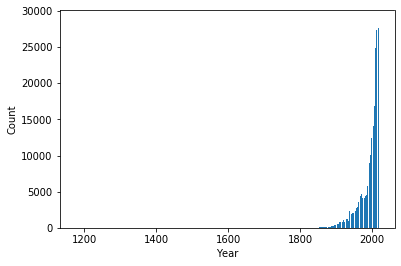

In [0]:
import matplotlib.pyplot as plt
g = g[g['year'] < 2020] # remove "future" published books
plt.bar(g['year'], list(g['Count']))
plt.xlabel("Year")
plt.ylabel("Count")


Let's zoom in to books published since 1900:

Text(0, 0.5, 'Count')

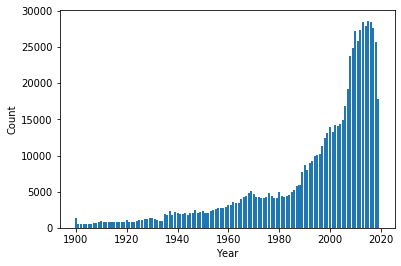

In [0]:
g2 =  g[g['year']>= 1900]
plt.bar(g2['year'], g2['Count'])
plt.xlabel("Year")
plt.ylabel("Count")

Let's look for the oldest book(s) in the library  (it can take some time):


In [0]:
sf[sf['year'] < 1350]['Title', 'Author', 'year'].unique()

Author,Title,year
,"[47 leaves from earlyprinted books, ...",1277
"Boccaccio, Giovanni,1313-1375, ...",Amorosa visione / diGiovanni Boccaccio ; ...,1342
,Linking transportationand land use planning : ...,1199
"Orton, Vrest, 1897-1986",Observations on theforgotten art of buil ...,1174


Let's find the manuscript details on Wikipedia:

In [0]:
!pip install wikipedia

In [0]:
import wikipedia
w = wikipedia.page('Amorosa visione')
w.summary

'Amorosa visione (1342, revised c. 1365) is a narrative poem by Boccaccio, full of echoes of the Divine Comedy and consisting of 50 canti in terza rima. It tells of a dream in which the poet sees, in sequence, the triumphs of Wisdom, Earthly Glory, Wealth, Love, all-destroying Fortune (and her servant Death), and thereby becomes worthy of the now heavenly love of Fiammetta. The triumphs include mythological, classical and contemporary medieval figures. Their moral, cultural and historical architecture was without precedent, and led Petrarch to create his own Trionfi on the same model. Among contemporaries Giotto and Dante stand out, the latter being celebrated above any other artist, ancient or modern.'

Let's find the most popular subjects in a specific  year:

In [0]:
sf2 = sf['BibNum','year', 'Subjects'] # to make things run faster, we create smaller SFrame
sf2['subject_list'] = sf2['Subjects'].apply(lambda s: s.split(","))
sf2['subject_list'] = sf2['subject_list'].apply(lambda l: [subject.strip() for subject in l])
sf2 = sf2.remove_column('Subjects')
# we want to remove the duplication of subject by specific books
sf2 = sf2.unique() 
sf2

BibNum,subject_list,year
2299874,"[Space colonies Drama,Space warfare Drama, ...",2004
3102550,"[Vitality, FatiguePrevention, Health] ...",2015
462874,"[Pharsalus Battle ofFarsala Greece 48 B C, ...",1928
1716783,[Apartment houses Energyconservation Washington ...,1982
3428724,"[Butterflies Life cyclesJuvenile literature, ...",2019
2792378,"[Vietnam War 1961 1975Juvenile fiction, ...",2012
2255555,"[Success, SuccessPsychological aspects] ...",2004
1980113,[United States ArmyPromotions] ...,1940
3209450,"[Lifeguards Training of,Aquatic sports Safety ...",2012
3153781,"[Bakers and bakeriesFiction, Cousins Juve ...",2015


In [0]:
sf2 = sf2.stack("subject_list", new_column_name="subject") 
sf2['subject']

dtype: str
Rows: 3019994
['Space colonies Drama', 'Space warfare Drama', 'Television series', 'Fiction television programs', 'Science fiction television programs', 'Video recordings for the hearing impaired', 'Vitality', 'Fatigue Prevention', 'Health', 'Pharsalus Battle of Farsala Greece 48 B C', 'Rome History Civil War 49 45 B C', 'Apartment houses Energy conservation Washington State Seattle', 'Dwellings Energy conservation Washington State Seattle', 'Electric power Conservation Washington State Seattle', 'Butterflies Life cycles Juvenile literature', 'Caterpillars Juvenile literature', 'Vietnam War 1961 1975 Juvenile fiction', 'Soldiers Juvenile fiction', 'War stories', 'Shooters of firearms Juvenile fiction', 'Best friends Juvenile fiction', 'Friendship Juvenile fiction', 'War Fiction', 'Sharpshooters Fiction', 'Success', 'Success Psychological aspects', 'United States Army Promotions', 'Lifeguards Training of', 'Aquatic sports Safety measures', 'Lifesaving', 'Drowning Prevention',

Using the stack to separate the subject list into separate rows, we got over 2.4 million subjects. Let's check what is the most common subject:


In [0]:
g = sf2.groupby('subject',{'Count': agg.COUNT()})
g.sort('Count', ascending=False ).print_rows(100)

+-------------------------------+-------+
|            subject            | Count |
+-------------------------------+-------+
|                               | 35433 |
|        Large type books       | 24947 |
| Video recordings for the h... | 21249 |
|         Graphic novels        | 19349 |
|        Mystery fiction        | 17158 |
|       Historical fiction      | 15342 |
|         Feature films         | 15296 |
|         Fiction films         | 11864 |
| Detective and mystery fiction | 11244 |
|          Love stories         | 11150 |
|        Fantasy fiction        |  9592 |
| Man woman relationships Fi... |  8643 |
|           Audiobooks          |  8642 |
|  Fiction television programs  |  8548 |
|        Science fiction        |  7966 |
|  Murder Investigation Fiction |  7586 |
|       Television series       |  7570 |
|       Thrillers Fiction       |  7267 |
|        Suspense fiction       |  7179 |
|        Domestic fiction       |  6759 |
|      Young adult fiction      | 

Let's visualize the subjects in a word cloud using [WordCloud Package](https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery):

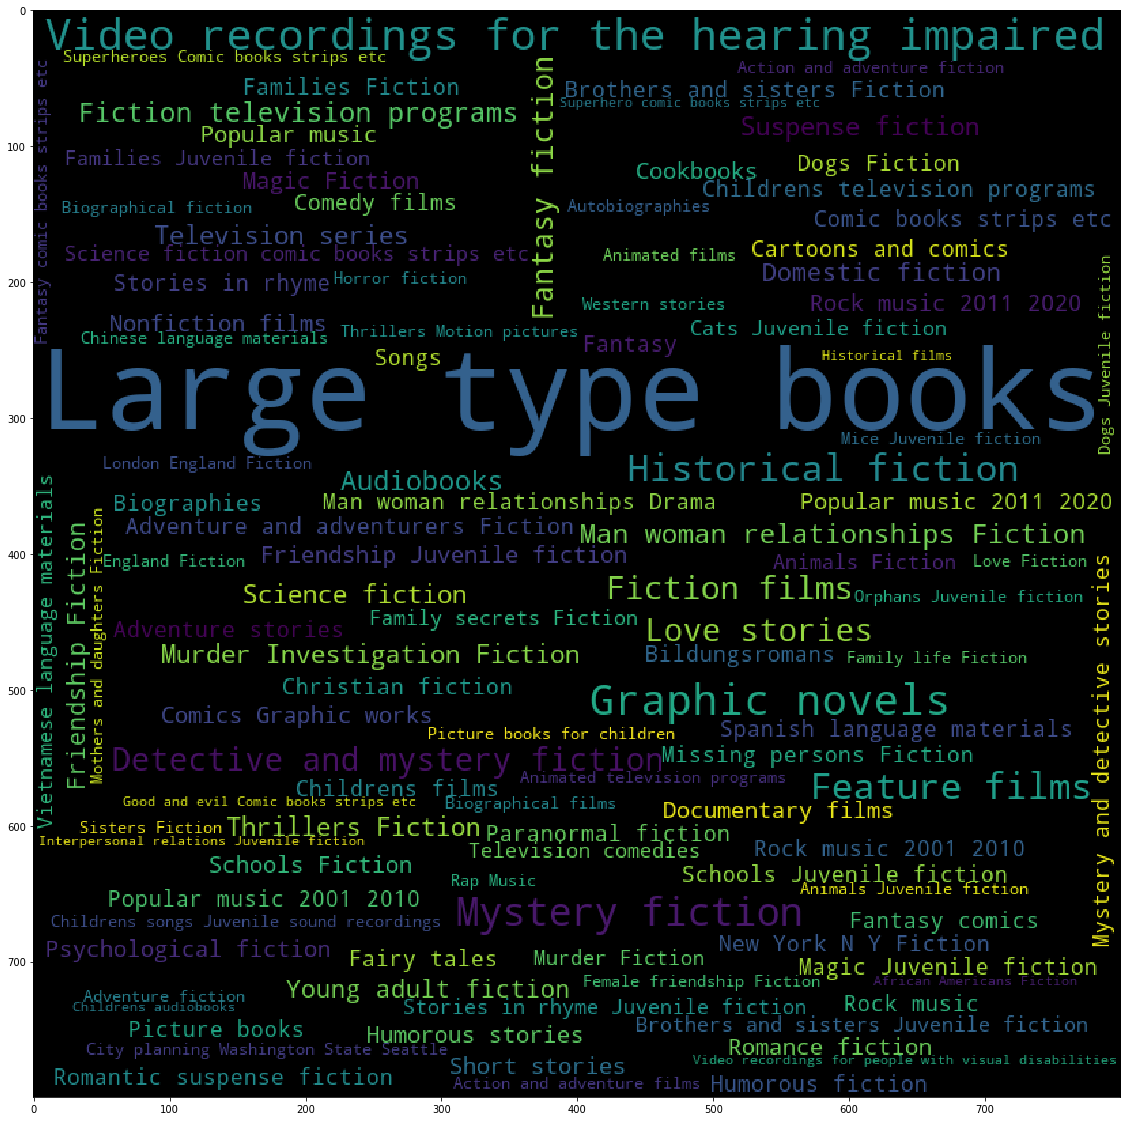

In [0]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10)

# using the subject frquencies
wordcloud.generate_from_frequencies(frequencies={r['subject']:r['Count'] for r in g})
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud)

## 2. Analyzing the Blog Authorship Corpus

For this part, we will analyze the [The Blog Authorship Corpus](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm).
The corpus consists of data from 9,320 bloggers who have written 681,288 posts. 
Each blogger's posts are saved as a separate XML files, in which each file name contains the blogger's metadata.
For example, _9470.male.25.Communications-Media.Aries.XML_ contains the posts of a 25-year-old male blogger, with Aries sign on the topic of Communications.

We will start by converting the XML files into a JSON file:

In [0]:
!mkdir ./datasets
!mkdir ./datasets/BIU-Blog-Authorship
!wget -O ./datasets/BIU-Blog-Authorship/blogs.zip http://www.cs.biu.ac.il/~koppel/blogs/blogs.zip

--2020-03-04 18:34:08--  http://www.cs.biu.ac.il/~koppel/blogs/blogs.zip
Resolving www.cs.biu.ac.il (www.cs.biu.ac.il)... 132.70.196.105
Connecting to www.cs.biu.ac.il (www.cs.biu.ac.il)|132.70.196.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs.biu.ac.il//~koppel/blogs/blogs.zip [following]
--2020-03-04 18:34:09--  https://cs.biu.ac.il//~koppel/blogs/blogs.zip
Resolving cs.biu.ac.il (cs.biu.ac.il)... 132.70.196.36
Connecting to cs.biu.ac.il (cs.biu.ac.il)|132.70.196.36|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://u.cs.biu.ac.il/~koppel/blogs/blogs.zip [following]
--2020-03-04 18:34:10--  http://u.cs.biu.ac.il/~koppel/blogs/blogs.zip
Resolving u.cs.biu.ac.il (u.cs.biu.ac.il)... 132.70.196.104
Connecting to u.cs.biu.ac.il (u.cs.biu.ac.il)|132.70.196.104|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 312949121 (298M) [application/zip]
Saving to: ‘./datasets/BIU-Blog

In [0]:
!unzip /content/datasets/BIU-Blog-Authorship/*.zip  -d /content/datasets/BIU-Blog-Authorship/

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4002831.male.23.indUnk.Aquarius.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4002909.female.27.indUnk.Virgo.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003064.male.15.Student.Capricorn.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003080.female.16.indUnk.Cancer.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003093.male.26.Student.Leo.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003147.female.24.Tourism.Aries.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003245.female.16.indUnk.Sagittarius.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003260.male.24.Student.Pisces.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003282.female.17.Student.Aquarius.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003311.male.15.Student.Cancer.xm

In [0]:
#first we create a directory to put the JSON files
import os
import json 
blogger_xml_dir = "/content/datasets/BIU-Blog-Authorship/blogs"
#os.mkdir("f{blogger_xml_dir}/json")

#We create a short code which parse the XML and convert it to JSON files
def get_posts_from_file(file_name):
    posts_dict = {}
    txt = open(file_name, "r",  encoding="utf8", errors='ignore').read()
    txt = txt.replace("&nbsp;", " ")
    for p in txt.split("</post>"):
        if "<post>" not in p or "<date>" not in p:
            continue
        post = p.split("<post>")[1].strip()
        dt = p.split("</date>")[0].split("<date>")[1].strip()
        posts_dict[dt] = post

    return posts_dict
            

def blogger_xml_to_json(file_name):
    l = file_name.split("/")[-1].split(".")
    if len(l) != 6:
        raise Exception("Could not analyze file f{file_name} - Length %s" % len(l) )
    j = {"id": l[0], "gender": l[1], "age":int(l[2]), "topic":l[3], "sign": l[4], "posts": get_posts_from_file(file_name)}
    return j

# converting all the XMLs to a single large JSON file
all_jsons = []
for p in os.listdir(blogger_xml_dir):
    if not p.endswith(".xml"):
        continue
    j = blogger_xml_to_json(f"{blogger_xml_dir}/" + p)
    all_jsons.append(j)
json.dump(all_jsons, open(f"{blogger_xml_dir}/all_bloggers.json","w" ))

Now let's load the JSON file to an SFrame object using the _read_json_ function:

In [0]:
import turicreate as tc
import turicreate.aggregate as agg


sf = tc.SFrame.read_json(f"{blogger_xml_dir}/all_bloggers.json")
sf

Parsing JSON records from /content/datasets/BIU-Blog-Authorship/blogs/all_bloggers.json

Successfully parsed 19320 elements from the JSON file /content/datasets/BIU-Blog-Authorship/blogs/all_bloggers.json

age,gender,id,posts,sign,topic
17,female,1171545,"{'01,February,2003':'Hello! welcome to my ...",Cancer,Non-Profit
38,male,3416672,"{'28,May,2004': 'Welltoday was a typical ...",Libra,Telecommunications
35,female,4149439,"{'20,August,2004': 'Ifall the world is a st ...",Cancer,HumanResources
24,male,4047559,"{'27,July,2004': ""This ismy first message, I'm ...",Cancer,indUnk
23,female,3806025,"{'30,June,2004':""consciousness requires ...",Sagittarius,indUnk
45,female,3359666,"{'31,May,2004': 'Ifcertain world famous ...",Scorpio,Non-Profit
17,male,1117656,"{'19,June,2004': 'Well,apparently some vampire- ...",Pisces,indUnk
23,female,4012646,"{'23,July,2004': ""damnwork! damn doctor who ...",Leo,indUnk
16,male,531918,"{'30,June,2004': 'I wasskimming through chan ...",Sagittarius,Student
13,female,4080710,"{'30,July,2004': ""My blogis devoted to learning ...",Libra,Student


Let's draw some charts using Matplotlib and Seaborn:


Text(0.5, 1.0, "Bloggers' Gender Distribution")

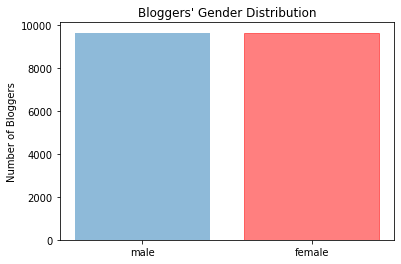

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
g = sf.groupby("gender", {"Count": agg.COUNT()})
barlist = plt.bar(g['gender'], g['Count'], align='center', alpha=0.5)
plt.ylabel('Number of Bloggers')
barlist[1].set_color('r') # changing the bar color
plt.title("Bloggers' Gender Distribution")

In [0]:
g = sf.groupby(["gender", "topic"], {"Count": agg.COUNT()})
g_male = g[g['gender'] == 'male'].rename({'gender': 'male', 'Count': 'Count_male'})
g_female = g[g['gender'] == 'female'].rename({'gender': 'female','Count': 'Count_female'})
g2 = g_male.join(g_female, on='topic', how="outer")
# filling out missing values
g2 = g2.fillna('Count_male', 0)
g2 = g2.fillna('Count_female', 0)
g2['total'] = g2.apply(lambda r: r['Count_male'] + r['Count_female'])
g2


male,topic,Count_male,female,Count_female,total
male,Science,100,female,84,184
male,Student,2641,female,2479,5120
male,Military,84,female,32,116
male,Marketing,73,female,107,180
male,Arts,302,female,419,721
male,LawEnforcement-Security,31,female,26,57
male,Government,141,female,95,236
male,Transportation,56,female,35,91
male,Communications-Media,270,female,209,479
male,Internet,296,female,101,397


Text(0, 0.5, 'Topic')

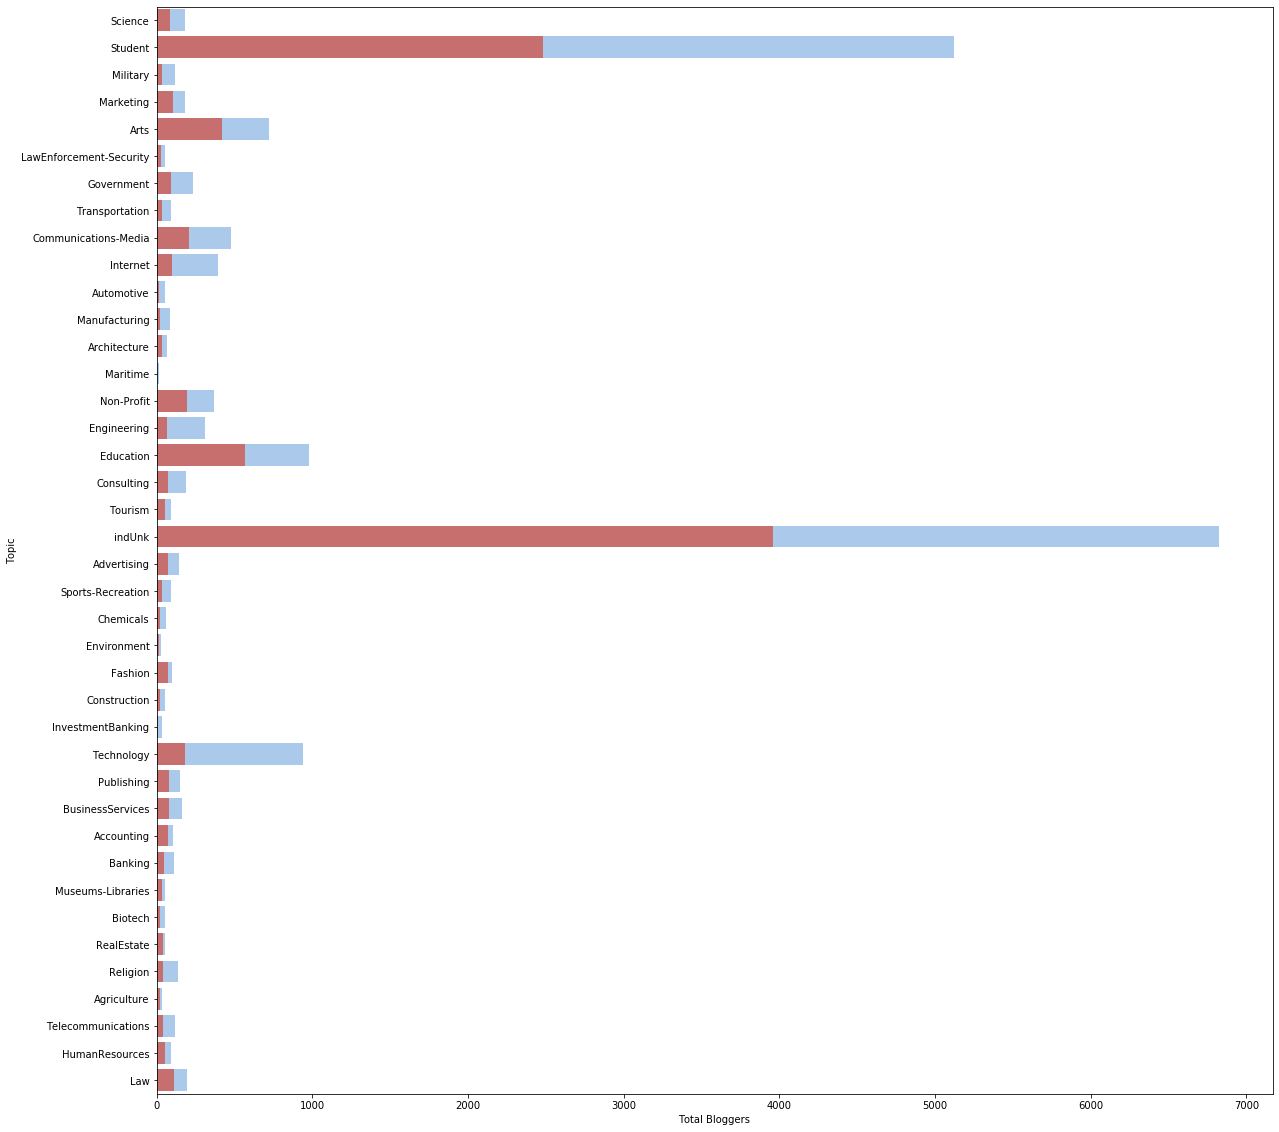

In [0]:
# see also https://seaborn.pydata.org/examples/horizontal_barplot.html
df = g2.to_dataframe()
plt.figure(figsize = (20, 20), facecolor = None) 
sns.set_color_codes("pastel")
sns.barplot(x="total", y="topic", data=df,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Count_female", y="topic", data=df,
            label="Total", color="r")
plt.xlabel("Total Bloggers")
plt.ylabel("Topic")


## 3. Matplotlib - A Closer Look

In this section, we will take a closer look into [matplotlib](https://matplotlib.org). 
We will use a version of the  [US Baby Names dataset](https://www.kaggle.com/kaggle/us-baby-names).


**Note:** This section is inspired from [Python Data Science Handbook, Chapter 4 - Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html), which is a very recommended read.

To use matplotlib, we first need to import it:

In [0]:
import matplotlib.pyplot as plt
# %matplotlib inline will lead to embbeded static images in the notebook
%matplotlib inline 


*Now* let's, download the dataset and load it using TuriCreate:

In [0]:
# Creating a dataset directory
!mkdir ./datasets/us-baby-name

# download the dataset from Kaggle and unzip it
!kaggle datasets download kaggle/us-baby-names -f NationalNames.csv -p ./datasets/us-baby-name/
!unzip ./datasets/us-baby-name/*.zip  -d ./datasets/us-baby-name/

  0% 0.00/11.5M [00:00<?, ?B/s]
100% 11.5M/11.5M [00:00<00:00, 105MB/s]
Archive:  ./datasets/us-baby-name/NationalNames.csv.zip
  inflating: ./datasets/us-baby-name/NationalNames.csv  


In [0]:
import turicreate as tc
sf = tc.SFrame.read_csv("./datasets/us-baby-name/NationalNames.csv")
sf

Finished parsing file /content/datasets/us-baby-name/NationalNames.csv

Parsing completed. Parsed 100 lines in 2.07959 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/us-baby-name/NationalNames.csv

Parsing completed. Parsed 1825433 lines in 1.22143 secs.

Id,Name,Year,Gender,Count
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
5,Minnie,1880,F,1746
6,Margaret,1880,F,1578
7,Ida,1880,F,1472
8,Alice,1880,F,1414
9,Bertha,1880,F,1320
10,Sarah,1880,F,1288


Now let's create a small DateFrame with data on the name _Elizabeth_, and create a figure with the name trends over time:


In [0]:
eliza_sf = sf[sf.apply(lambda r: r['Gender'] == 'F' and r['Name'] == "Elizabeth")].sort("Year")
eliza_sf

Id,Name,Year,Gender,Count
4,Elizabeth,1880,F,1939
2004,Elizabeth,1881,F,1852
3939,Elizabeth,1882,F,2187
6066,Elizabeth,1883,F,2255
8150,Elizabeth,1884,F,2549
10447,Elizabeth,1885,F,2582
12741,Elizabeth,1886,F,2680
15132,Elizabeth,1887,F,2681
17505,Elizabeth,1888,F,3224
20156,Elizabeth,1889,F,3058


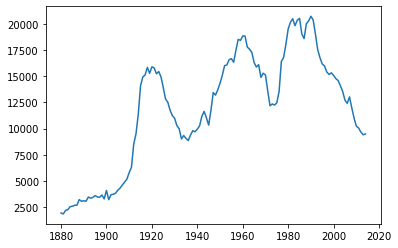

In [0]:
x = list(eliza_sf["Year"])
y = list(eliza_sf["Count"])
plt.plot(x, y)

We can change the image styles using the following:

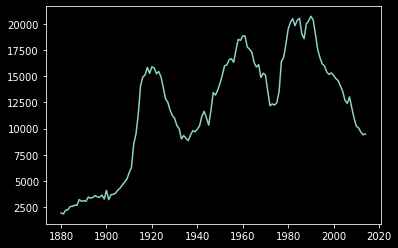

In [0]:
plt.style.use('dark_background') 
plt.plot(x, y)

We can use _print(plt.style.available)_ to get all the available  styles:

In [0]:
print(plt.style.available)

['seaborn-ticks', 'classic', 'seaborn-deep', 'seaborn-white', 'seaborn-darkgrid', 'tableau-colorblind10', 'seaborn-talk', 'fivethirtyeight', 'fast', 'seaborn-muted', 'seaborn-bright', 'bmh', 'seaborn-notebook', 'ggplot', 'seaborn', 'seaborn-colorblind', 'seaborn-paper', 'seaborn-dark', 'Solarize_Light2', 'seaborn-pastel', 'seaborn-dark-palette', 'dark_background', 'seaborn-whitegrid', 'seaborn-poster', '_classic_test', 'grayscale']


If we have two or more curves, there are two interfaces that we can use to plot the curves in subplots. The first interface is *MATLAB-style Interface*. The second interface is *Object-oriented interface*. Let's draw the curve with each one of the interfaces:

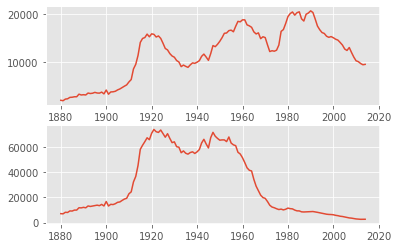

In [0]:
mary_sf = sf[sf.apply(lambda r: r['Gender'] == 'F' and r['Name'] == "Mary")].sort("Year")

plt.style.use('ggplot') 
#MATLAB Style Interface
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(list(eliza_sf["Year"]), list(eliza_sf["Count"]))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(list(mary_sf["Year"]), list(mary_sf["Count"]))

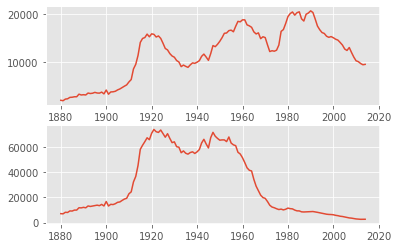

In [0]:
# Object-oriented interface
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(list(eliza_sf["Year"]), list(eliza_sf["Count"]))
ax[1].plot(list(mary_sf["Year"]), list(mary_sf["Count"]))

We can also draw both curves on a single axis:

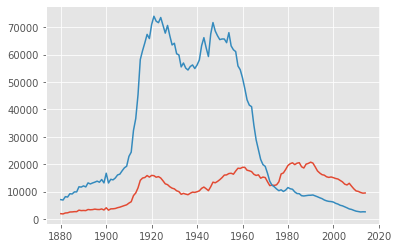

In [0]:
#MATLAB Style Interface
plt.plot(list(eliza_sf["Year"]), list(eliza_sf["Count"]))
plt.plot(list(mary_sf["Year"]), list(mary_sf["Count"]))

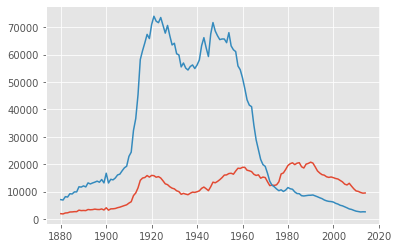

In [0]:
# Object-oriented interface
fig = plt.figure()
ax = plt.axes()

ax.plot(list(eliza_sf["Year"]), list(eliza_sf["Count"]))
ax.plot(list(mary_sf["Year"]), list(mary_sf["Count"]))

Using Matplotlib, we can easily adjust various parts of the chart. For example, we can easily control the line style and color:

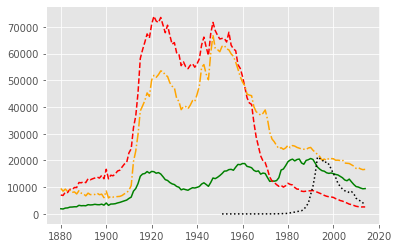

In [0]:
def get_name_count_by_year(sf, gender, name):
    return sf[sf.apply(lambda r: r['Gender'] == gender and r['Name'] == name)].sort("Year")

william_sf = get_name_count_by_year(sf,"M", "William")
taylor_sf = get_name_count_by_year(sf,"F", "Taylor")


plt.plot(list(eliza_sf["Year"]), list(eliza_sf["Count"]), linestyle='solid', color='green')
plt.plot(list(mary_sf["Year"]), list(mary_sf["Count"]), linestyle='dashed', color='red')
plt.plot(list(william_sf["Year"]), list(william_sf["Count"]), linestyle='dashdot', color='orange')
plt.plot(list(taylor_sf["Year"]), list(taylor_sf["Count"]), linestyle='dotted', color='black')


We can also control the axis ranges:

(5000, 30000)

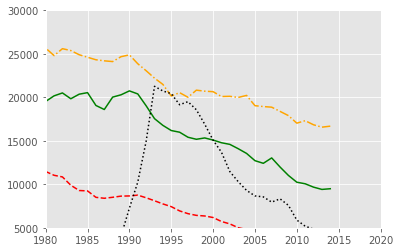

In [0]:
plt.plot(list(eliza_sf["Year"]), list(eliza_sf["Count"]), linestyle='solid', color='green')
plt.plot(list(mary_sf["Year"]), list(mary_sf["Count"]), linestyle='dashed', color='red')
plt.plot(list(william_sf["Year"]), list(william_sf["Count"]), linestyle='dashdot', color='orange')
plt.plot(list(taylor_sf["Year"]), list(taylor_sf["Count"]), linestyle='dotted', color='black')

plt.xlim(1980,2020)
plt.ylim(5000, 30000)

Additionally, we can add labels and text to the chart:

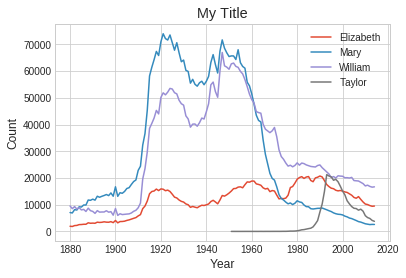

In [0]:
plt.style.use('seaborn-whitegrid')

plt.plot(list(eliza_sf["Year"]), list(eliza_sf["Count"]), label="Elizabeth" )
plt.plot(list(mary_sf["Year"]), list(mary_sf["Count"]), label="Mary")
plt.plot(list(william_sf["Year"]), list(william_sf["Count"]), label="William")
plt.plot(list(taylor_sf["Year"]), list(taylor_sf["Count"]), label="Taylor")
plt.title("My Title")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend();

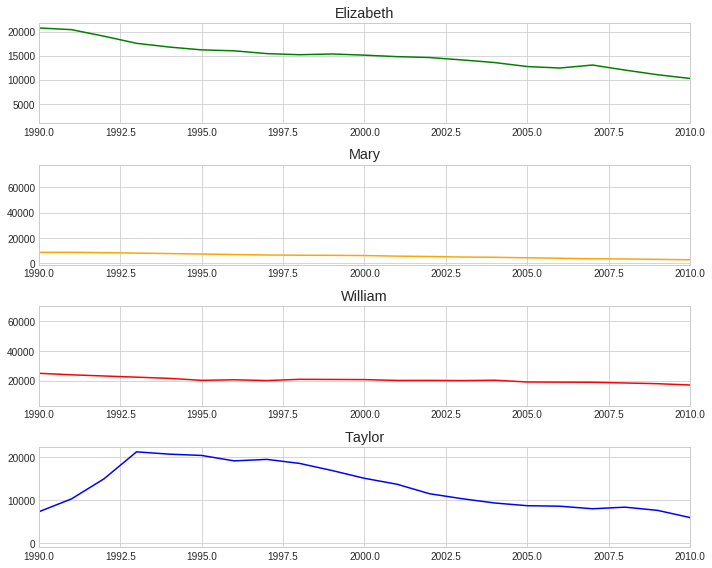

In [0]:
#Using the Object Oriented  Interface
fig, ax = plt.subplots(4)
fig.set_size_inches(10, 8)

# Call plot() method on the appropriate object
ax[0].plot(list(eliza_sf["Year"]), list(eliza_sf["Count"]), color="green")
ax[1].plot(list(mary_sf["Year"]), list(mary_sf["Count"]), color="orange")
ax[2].plot(list(william_sf["Year"]), list(william_sf["Count"]),color="red")
ax[3].plot(list(taylor_sf["Year"]), list(taylor_sf["Count"]), color="blue")

names = ["Elizabeth", "Mary", "William", "Taylor"]
for i in range(4):
    ax[i].set_title(names[i])
    ax[i].set_xlim(1990,2010)

plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area 


We can also use several plot types in one figure:

(0, 22000)

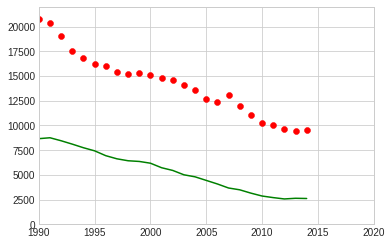

In [0]:
plt.scatter(list(eliza_sf["Year"]), list(eliza_sf["Count"]), color='red')
plt.plot(list(mary_sf["Year"]), list(mary_sf["Count"]), color='green')

plt.xlim(1990,2020)
plt.ylim(0,22000)

We can also adjust other line attributes:

(0, 22000)

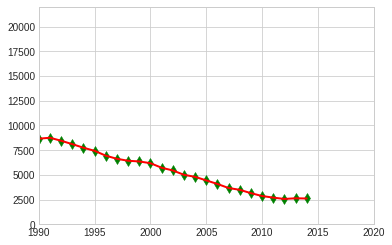

In [0]:
plt.scatter(list(mary_sf["Year"]), list(mary_sf["Count"]), color='green', label="Mary",  marker='d', s=50)
plt.plot(list(mary_sf["Year"]), list(mary_sf["Count"]), color='red', linewidth=2 )

plt.xlim(1990,2020)
plt.ylim(0,22000)

Using Scatter, we can also control the size of each individual point. Let's find the 12 most popular names and visualize how they changed over time:

In [0]:
import turicreate as tc
import turicreate.aggregate as agg

g = sf.groupby("Name", {"Total": agg.SUM("Count")})
g= g.sort("Total", ascending=False)
g

Name,Total
James,5129096
John,5106590
Robert,4816785
Michael,4330805
Mary,4130441
William,4071368
David,3590557
Joseph,2580687
Richard,2564867
Charles,2376700


In [0]:
# selecting the top names
top_names_set = set(g['Name'][:12])
# Creating a new SFrame with only the top-12 names data
top_sf = sf[sf['Name'].apply(lambda n: n in top_names_set)]

top_names_dict = {}
for n in top_names_set:
    n_sf = top_sf[top_sf["Name"] == n].sort("Year")
    top_names_dict[n] = {"x": list(n_sf["Year"]), "y":list(n_sf["Count"])  }


Let's draw all the top-name trends as scatter plots:

(1900, 2000)

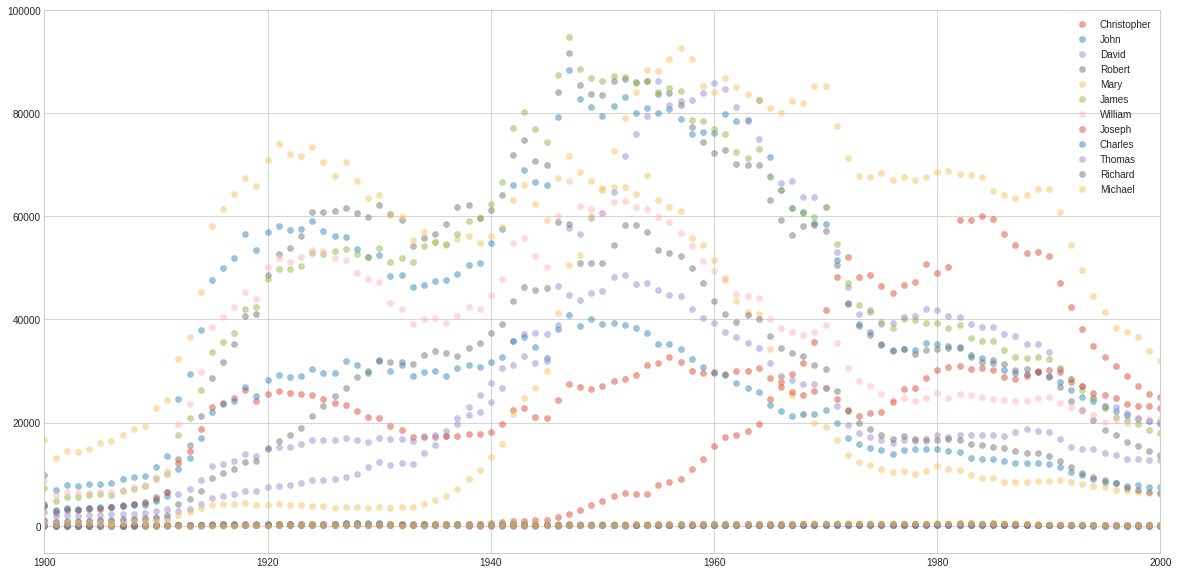

In [0]:
plt.figure(figsize=(20,10)) 
for n in top_names_set:
    plt.scatter(top_names_dict[n]["x"], top_names_dict[n]["y"], label=n,  alpha=0.5)
plt.legend()
plt.xlim(1900,2000)

(1900, 2000)

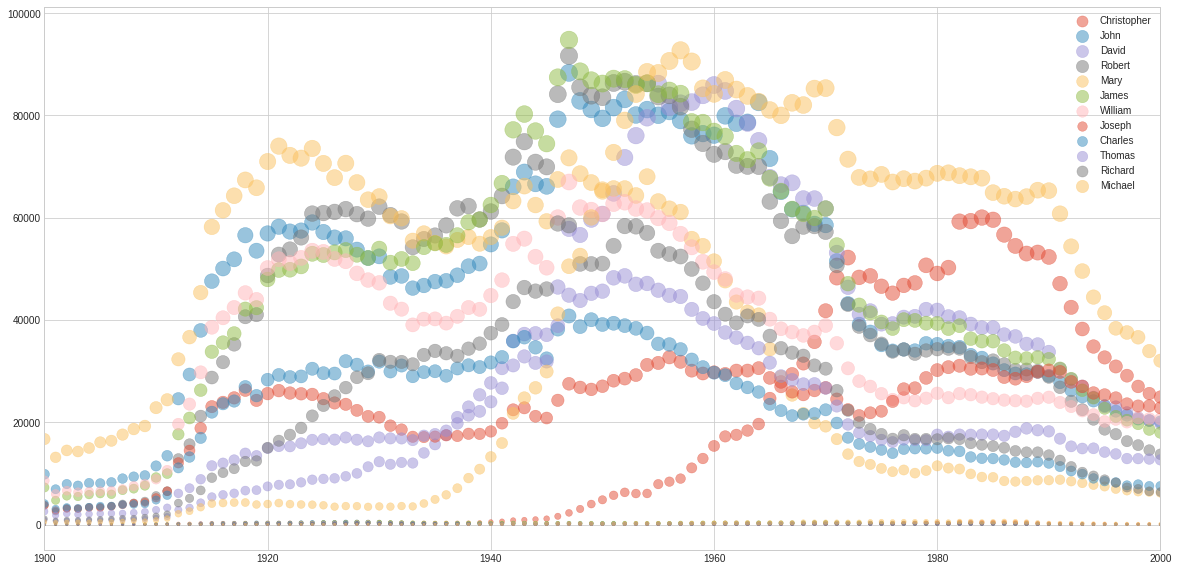

In [0]:
import math
plt.figure(figsize=(20,10)) 

for n in top_names_set:    
    # Setting each marker size to be the size of the square-root of the count
    marker_sizes = [math.sqrt(c) for c in top_names_dict[n]["y"]]    
    plt.scatter(top_names_dict[n]["x"], top_names_dict[n]["y"],s=marker_sizes, label=n,  alpha=0.5)
plt.legend()
plt.xlim(1900,2000)

## 4. Seaborn -  A Closer Look

Seaborn is a great tool to work with DataFrames with improved default styles. It is great to easily create a variety of beautiful data plots. For this section, we will use [Marvel Superheroes datasets](https://www.kaggle.com/dannielr/marvel-superheroes).  We will start by downloading the dataset and loading the data into DataFrame:

In [0]:
# Creating a dataset directory
!mkdir ./datasets/marvel-superheroes

# download the dataset from Kaggle and unzip it
!kaggle datasets download dannielr/marvel-superheroes -f marvel_characters_info.csv -p ./datasets/marvel-superheroes

mkdir: cannot create directory ‘./datasets/marvel-superheroes’: No such file or directory
  0% 0.00/45.2k [00:00<?, ?B/s]
100% 45.2k/45.2k [00:00<00:00, 17.7MB/s]


In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set() # set style to seaborn defaults

df = pd.read_csv("./datasets/marvel-superheroes/marvel_characters_info.csv", na_values=["-"])
# remove rows with missing values or negative weight and height values
df = df.dropna() 
df = df[df["Height"] > 0] 
df = df[df["Weight"] > 0]

df

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
34,34,Apocalypse,bad,Male,red,Mutant,Black,Marvel Comics,grey,213.0,135.0
39,39,Archangel,good,Male,blue,Mutant,Blond,Marvel Comics,blue,183.0,68.0
41,41,Ardina,good,Female,white,Alien,Orange,Marvel Comics,gold,193.0,98.0
56,56,Azazel,bad,Male,yellow,Neyaphem,Black,Marvel Comics,red,183.0,67.0
74,74,Beast,good,Male,blue,Mutant,Blue,Marvel Comics,blue,180.0,181.0
75,75,Beast Boy,good,Male,green,Human,Green,DC Comics,green,173.0,68.0
92,92,Bizarro,neutral,Male,black,Bizarro,Black,DC Comics,white,191.0,155.0
108,108,Blackout,bad,Male,red,Demon,White,Marvel Comics,white,191.0,104.0


(0, 300)

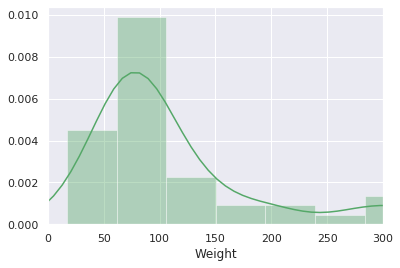

In [0]:
sns.set_style()
sns.distplot(df['Weight'], color="g")
plt.xlim(0,300)

We can play with various parameters to get some different figures:

(0, 300)

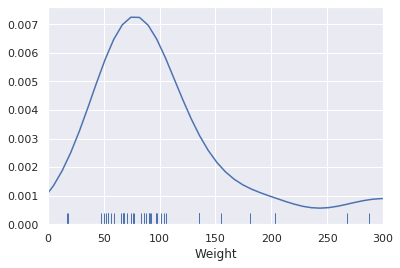

In [0]:
sns.distplot(df['Weight'], rug=True, hist=False) # rug = True - draw rug plot
plt.xlim(0,300)

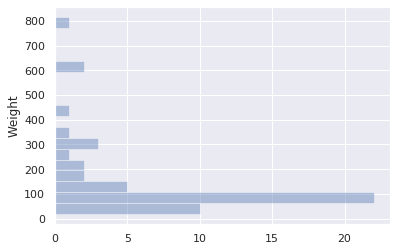

In [0]:
sns.distplot(df['Weight'], vertical=True, kde=False) # KDE =True - draw gaussian kernel density estimate

We can easily create beautiful joint plots with two parameters:

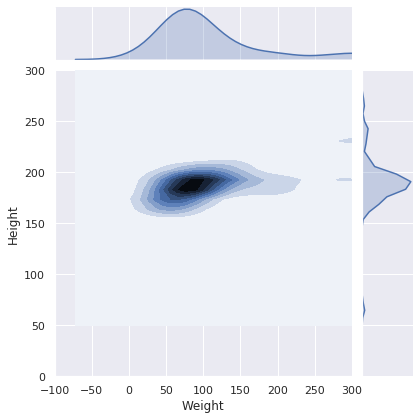

In [0]:
sns.jointplot(df["Weight"], df["Height"], kind="kde", xlim=(-100,300), ylim=(0,300))

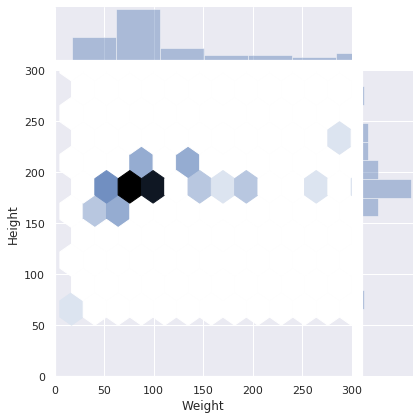

In [0]:
sns.jointplot(df["Weight"], df["Height"], kind="hex", xlim=(0,300), ylim=(0,300))

My most beloved feature in Seaborn is the easy API to visualize several-dimensions data in a grid layout. Let's start by an example in which we plot the superheroes' weight according to the superheroes’ alignment and gender:

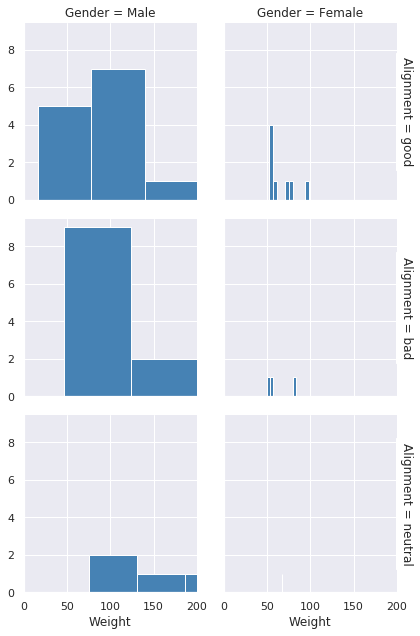

In [0]:
g = sns.FacetGrid(df, col="Gender", row="Alignment", margin_titles=True, xlim=(0,200), sharex=True) # this will create a grid
g.map(plt.hist, "Weight", color="steelblue")

Let's add colors to the subplots. Each marker color is according to the _race_ of the character:

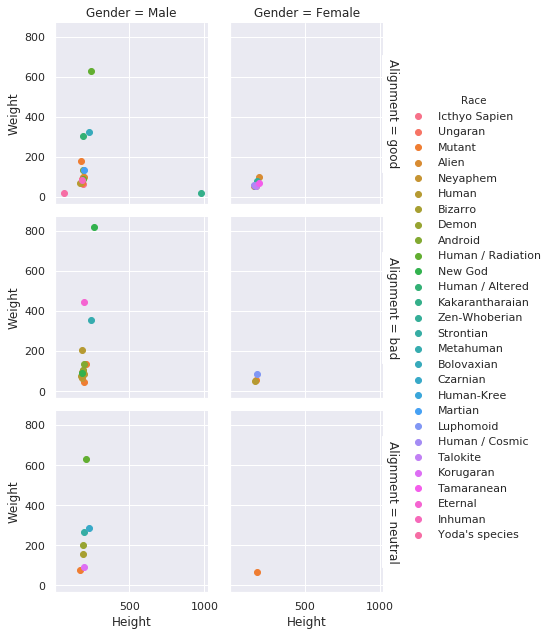

In [0]:
g = sns.FacetGrid(df, col="Gender", row="Alignment", margin_titles=True, hue="Race") 
g.map(plt.scatter, "Height", "Weight").add_legend()

We can also use Seaborn to create beautiful [box plots](https://en.wikipedia.org/wiki/Box_plot) and [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Let's see some examples:

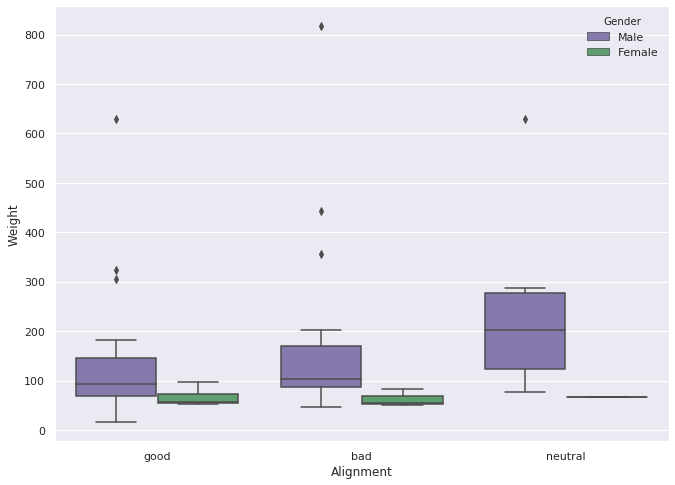

In [0]:
sns.set(rc={'figure.figsize':(11,8)}) # set figure size
sns.boxplot(x="Alignment", y="Weight",
            hue="Gender", palette=["m", "g"], 
            data=df)

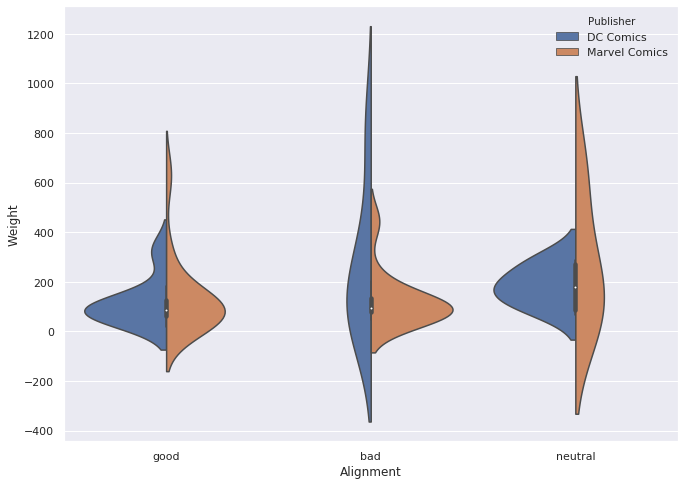

In [0]:
df = df[df["Publisher"].isin(("DC Comics","Marvel Comics"))]
sns.violinplot(hue="Publisher", x="Alignment", y="Weight",  data=df, split=True)

## 5. SJR Journal Ranking Dataset

Let's download the [SJR Journal Ranking of 2018](https://www.scimagojr.com/journalrank.php), and load it into an SFrame
object:

In [0]:
!mkdir ./datasets/sjr/
!wget -O ./datasets/sjr/sjr2018.csv https://www.scimagojr.com/journalrank.php?out=xls 

mkdir: cannot create directory ‘./datasets/sjr/’: File exists
--2020-03-04 21:31:45--  https://www.scimagojr.com/journalrank.php?out=xls
Resolving www.scimagojr.com (www.scimagojr.com)... 94.130.25.5
Connecting to www.scimagojr.com (www.scimagojr.com)|94.130.25.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘./datasets/sjr/sjr2018.csv’

./datasets/sjr/sjr2     [     <=>            ]   7.72M  8.82MB/s    in 0.9s    

2020-03-04 21:31:46 (8.82 MB/s) - ‘./datasets/sjr/sjr2018.csv’ saved [8092447]



In [0]:
import turicreate as tc
import seaborn as sns
sf = tc.SFrame.read_csv("./datasets/sjr/sjr2018.csv", delimiter=";")
sf

Unexpected characters after last column. "5600157617"
Parse failed at token ending at: 
	neering (Q2); Mechanical Engineering (Q3)"
14771;5600157617;^"Criminal Law and Philosophy";journal;"18719791,
Successfully parsed 19 tokens: 
	0: 14770
	1: 63703
	2: Chuan Bo L ...  Mechanics
	3: journal
	4: 10077294
	5: 0,270
	6: Q2
	7: 16
	8: 151
	9: 487
	10: 2493
	11: 142
	12: 487
	13: 0,29
	14: 16,51
	15: China
	16: Chuan bo li xue
	17: 1998-ongoing
	18: Ocean Engi ... ering (Q3)

1 lines failed to parse correctly

Finished parsing file /content/datasets/sjr/sjr2018.csv

Parsing completed. Parsed 100 lines in 0.189529 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,str,str,int,int,int,int,int,int,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "5600157617"
Parse failed at token ending at: 
	neering (Q2); Mechanical Engineering (Q3)"
14771;5600157617;^"Criminal Law and Philosophy";journal;"18719791,
Successfully parsed 19 tokens: 
	0: 14770
	1: 63703
	2: Chuan Bo L ...  Mechanics
	3: journal
	4: 10077294
	5: 0,270
	6: Q2
	7: 16
	8: 151
	9: 487
	10: 2493
	11: 142
	12: 487
	13: 0,29
	14: 16,51
	15: China
	16: Chuan bo l ... bian ji bu
	17: 1998-ongoing
	18: "Ocean Eng ... Q3)"
14771

1 lines failed to parse correctly

Finished parsing file /content/datasets/sjr/sjr2018.csv

Parsing completed. Parsed 26279 lines in 0.14549 secs.

Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index
1,28773,CA - A Cancer Journal forClinicians ...,journal,"15424863, 00079235","72,576",Q1,144
2,19434,MMWR. Recommendations andreports : Morbidity and ...,journal,"10575987, 15458601","48,894",Q1,134
3,21100812243,Nature Reviews Materials,journal,20588437,"34,171",Q1,61
4,29431,Quarterly Journal ofEconomics ...,journal,"00335533, 15314650","30,490",Q1,228
5,18991,Nature Reviews Genetics,journal,"14710056, 14710064","30,428",Q1,320
6,20315,Nature Reviews MolecularCell Biology ...,journal,"14710072, 14710080","30,397",Q1,386
7,12464,Nature Reviews Cancer,journal,1474175X,"28,061",Q1,396
8,58530,National vital statisticsreports : from the ...,journal,"15518922, 15518930","27,310",Q1,89
9,21318,Nature Reviews Immunology,journal,14741733,"26,208",Q1,351
10,18434,Cell,journal,"00928674, 10974172","25,976",Q1,705


In [0]:
sf2 = sf.remove_columns(["Country", "Publisher","Categories","Title", "Issn", "SJR Best Quartile", "Type"] )

def convert_comma_str_to_float(s):
    try:
        return float(s.replace(",", "."))
    except:
        return 0
    
for i in ["SJR", "Cites / Doc. (2years)", "Ref. / Doc."]:
    sf2[i] = sf2[i].apply(lambda s: convert_comma_str_to_float(s)) # replace "," with "." and convert to float
sf2.materialize()
sf2 

Rank,Sourceid,SJR,H index,Total Docs. (2018),Total Docs. (3years),Total Refs.,Total Cites (3years)
1,28773,72.576,144,45,127,3078,20088
2,19434,48.894,134,3,12,559,1043
3,21100812243,34.171,61,99,195,8124,7297
4,29431,30.49,228,40,124,2498,1495
5,18991,30.428,320,110,387,7954,6395
6,20315,30.397,386,119,391,9221,7208
7,12464,28.061,396,115,361,8240,8367
8,58530,27.31,89,8,32,114,1236
9,21318,26.208,351,152,434,8185,7777
10,18434,25.976,705,641,1905,31265,46286


Let's create a correlation heatmap of the various columns using Seaborn:

In [0]:
corr_df = sf2.to_dataframe().corr() # creating correlations matrix
corr_df

,Rank,Sourceid,SJR,H index,Total Docs. (2018),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.
Rank,1.000000,0.371143,-0.473149,-0.608087,-0.222138,-0.176551,-0.249663,-0.212763,-0.171746,-0.345933,-0.392818
Sourceid,0.371143,1.000000,-0.187772,-0.462062,-0.136690,-0.117313,-0.128040,-0.100669,-0.110971,-0.125320,-0.192753
SJR,-0.473149,-0.187772,1.000000,0.605705,0.138433,0.119481,0.170051,0.301947,0.101747,0.591200,0.274623
H index,-0.608087,-0.462062,0.605705,1.000000,0.396472,0.376704,0.420397,0.532377,0.352764,0.405046,0.293419
Total Docs. (2018),-0.222138,-0.136690,0.138433,0.396472,1.000000,0.915097,0.920892,0.759454,0.907144,0.123674,0.072756
Total Docs. (3years),-0.176551,-0.117313,0.119481,0.376704,0.915097,1.000000,0.849188,0.787492,0.993133,0.100368,0.041228
Total Refs.,-0.249663,-0.128040,0.170051,0.420397,0.920892,0.849188,1.000000,0.821838,0.856765,0.154230,0.143564
Total Cites (3years),-0.212763,-0.100669,0.301947,0.532377,0.759454,0.787492,0.821838,1.000000,0.781887,0.227821,0.085154
Citable Docs. (3years),-0.171746,-0.110971,0.101747,0.352764,0.907144,0.993133,0.856765,0.781887,1.000000,0.086331,0.044562
Cites / Doc. (2years),-0.345933,-0.125320,0.591200,0.405046,0.123674,0.100368,0.154230,0.227821,0.086331,1.000000,0.232311


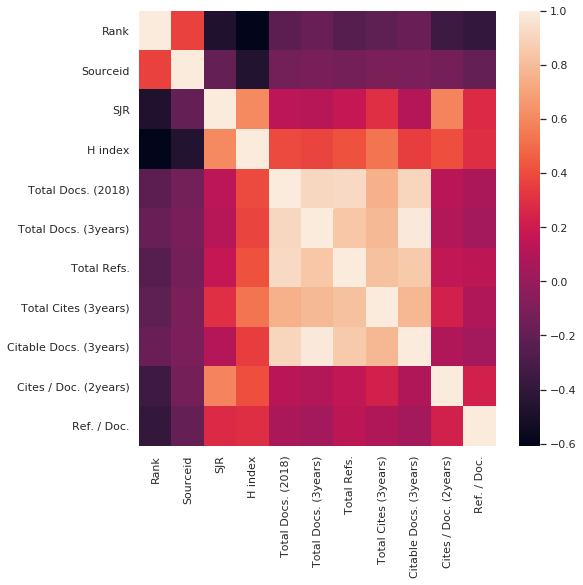

In [0]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)

## 6. Interactive Visualization Tools - Using Altair

While Matplotlib and Seaborn can create beautiful and useful static figures, in some cases we would like to create interactive charts. There are many tools for creating amazing interactive charts, such as [D3.js](https://github.com/d3/d3/wiki/Gallery), [Plotly.js](https://plot.ly/javascript/), and [Vega & Vega-Lite](https://vega.github.io). In this course, we will use [Altair](https://altair-viz.github.io). Altair is a visualization library for Python, based on Vega and Vega-Lite. Let's install it, and start with some simple examples:

```console 
# Install if not using colab
$ pip install altair vega_datasets 
```

In [0]:
import altair as alt
import pandas as pd

df = pd.read_csv("./datasets/marvel-superheroes/marvel_characters_info.csv", na_values=["-"])
# remove rows with missing values or negative weight and height values
df = df.dropna() 
df = df[df["Height"] > 0] 
df = df[df["Weight"] > 0]

brush = alt.selection(type='interval', resolve='global')
alt.Chart(df).mark_point().encode(
    x='Height:Q',  
    y='Weight:Q',
    color='Alignment'
)


alt.Chart(...)

## 7. Interactive Visualization Tools - Using PlotlyExpress

[PlotlyExpress](https://plot.ly/python/plotly-express/) is an amazing and easy to use package for creating visualization. Let's use it to visualize some Pokemon data

In [0]:
!kaggle datasets download abcsds/pokemon -p ./datasets/
!unzip ./datasets/pokemon.zip -d ./datasets/pokemon/

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 12.0MB/s]
Archive:  ./datasets/pokemon.zip
  inflating: ./datasets/pokemon/Pokemon.csv  


In [0]:
import plotly.express as px
import pandas as pd
df = pd.read_csv('./datasets/pokemon/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [0]:
fig = px.scatter_3d(df[:100], x="Attack", y="Defense", z="Speed", color="Type 1", hover_name="Name",symbol="Legendary")
fig.show()

## Further Readings and Practice
* [TuriCreate User Guide](https://apple.github.io/turicreate/docs/userguide/)
* [Pyplot Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
* [Official Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
* [Altair Tutorial](https://github.com/altair-viz/altair-tutorial)
* [Plotly Express](https://plot.ly/python/plotly-express/)


